# Hand in 2 (computer part)

Frans Skarman (199509085552)

In [ ]:


#
from typing import List
from sage.all import *
import functools


In [2]:
## Utilities

def count_orders(max_n, group):
    counts = [0]*max_n
    for g in group:
        o = order(g)
        if o <= max_n:
            counts[o-1] += 1

    return counts


def tabulate_f(max_n, counter):
    print(" g  : ", end="")
    for i in range(1, max_n + 1):
        print(f"{i:>2} ", end="")
    print()
    for n in range(1, max_n + 1):
        orders = counter(max_n, n)

        print(f"[{n:>2}]: ", end = "")
        for order in orders:
            if order != 0:
                print(f"{order:>2} ", end = "")
            else:
                print(" . ", end = "")
        print()


# Question 1

In [3]:
def q1():
    def compute_orders(max_n, n):
        def inner(k):
            if n % k == 0:
                return euler_phi(k)
            else:
                return 0

        return list(map(inner, range(1, max_n+1)))

    tabulate_f(12, lambda max_n, n: count_orders(max_n, CyclicPermutationGroup(n)))
    print()
    tabulate_f(12, compute_orders)

q1()


 g  :  1  2  3  4  5  6  7  8  9 10 11 12 
[ 1]:  1  .  .  .  .  .  .  .  .  .  .  . 
[ 2]:  1  1  .  .  .  .  .  .  .  .  .  . 
[ 3]:  1  .  2  .  .  .  .  .  .  .  .  . 
[ 4]:  1  1  .  2  .  .  .  .  .  .  .  . 
[ 5]:  1  .  .  .  4  .  .  .  .  .  .  . 
[ 6]:  1  1  2  .  .  2  .  .  .  .  .  . 
[ 7]:  1  .  .  .  .  .  6  .  .  .  .  . 
[ 8]:  1  1  .  2  .  .  .  4  .  .  .  . 
[ 9]:  1  .  2  .  .  .  .  .  6  .  .  . 
[10]:  1  1  .  .  4  .  .  .  .  4  .  . 
[11]:  1  .  .  .  .  .  .  .  .  . 10  . 
[12]:  1  1  2  2  .  2  .  .  .  .  .  4 

 g  :  1  2  3  4  5  6  7  8  9 10 11 12 
[ 1]:  1  .  .  .  .  .  .  .  .  .  .  . 
[ 2]:  1  1  .  .  .  .  .  .  .  .  .  . 
[ 3]:  1  .  2  .  .  .  .  .  .  .  .  . 
[ 4]:  1  1  .  2  .  .  .  .  .  .  .  . 
[ 5]:  1  .  .  .  4  .  .  .  .  .  .  . 
[ 6]:  1  1  2  .  .  2  .  .  .  .  .  . 
[ 7]:  1  .  .  .  .  .  6  .  .  .  .  . 
[ 8]:  1  1  .  2  .  .  .  4  .  .  .  . 
[ 9]:  1  .  2  .  .  .  .  .  6  .  .  . 
[10]:  1  

# Question 2

In [4]:
def q2():
    def compute_orders(max_n, n):
        counts = [0]*max_n

        # Reflections
        counts[1] += n

        # Rotations by `r/n * 360`. To make the code simpler, skip r=0 and
        # use r=n instead
        for r in range(1, n+1):
            o = n / gcd(n, r)
            counts[o-1] += 1


        return counts

    tabulate_f(12, lambda max_n, n: count_orders(max_n, DihedralGroup(n)))
    print("")
    tabulate_f(12, lambda max_n, n: compute_orders(max_n, n))

q2()


 g  :  1  2  3  4  5  6  7  8  9 10 11 12 
[ 1]:  1  1  .  .  .  .  .  .  .  .  .  . 
[ 2]:  1  3  .  .  .  .  .  .  .  .  .  . 
[ 3]:  1  3  2  .  .  .  .  .  .  .  .  . 
[ 4]:  1  5  .  2  .  .  .  .  .  .  .  . 
[ 5]:  1  5  .  .  4  .  .  .  .  .  .  . 
[ 6]:  1  7  2  .  .  2  .  .  .  .  .  . 
[ 7]:  1  7  .  .  .  .  6  .  .  .  .  . 
[ 8]:  1  9  .  2  .  .  .  4  .  .  .  . 
[ 9]:  1  9  2  .  .  .  .  .  6  .  .  . 
[10]:  1 11  .  .  4  .  .  .  .  4  .  . 
[11]:  1 11  .  .  .  .  .  .  .  . 10  . 
[12]:  1 13  2  2  .  2  .  .  .  .  .  4 

 g  :  1  2  3  4  5  6  7  8  9 10 11 12 
[ 1]:  1  1  .  .  .  .  .  .  .  .  .  . 
[ 2]:  1  3  .  .  .  .  .  .  .  .  .  . 
[ 3]:  1  3  2  .  .  .  .  .  .  .  .  . 
[ 4]:  1  5  .  2  .  .  .  .  .  .  .  . 
[ 5]:  1  5  .  .  4  .  .  .  .  .  .  . 
[ 6]:  1  7  2  .  .  2  .  .  .  .  .  . 
[ 7]:  1  7  .  .  .  .  6  .  .  .  .  . 
[ 8]:  1  9  .  2  .  .  .  4  .  .  .  . 
[ 9]:  1  9  2  .  .  .  .  .  6  .  .  . 
[10]:  1 1

# Question 3

In [5]:

def q3():
    # Computes lcm(lcm(lcm(...))) of a list of integers
    def cross_lcm(inputs):
        return functools.reduce(lambda x, y: lcm(x, y), inputs[1:], inputs[0])


    # Returns the cycle types possible in S_n wher min is the minimum length of the
    # cycle i.e. cycle_types(6, 2) will return [[2, 2 2], [3,3], [6]]
    # When called with cycle_types(n, 1) it returns *all* cycle types of S_n
    def cycle_types(n: int, max_type: int) -> List[List[int]]:
        if n == 0:
            return [[]]
        result = []
        for k in range(1, min(max_type, n) + 1):
            # If this is a perfect fit
            rest = cycle_types(n-k, k)
            for type in rest:
                result += [[k] + type]
        return result


    def final_answer(max_n, n):
        counts = [0]*max_n*2
        for ct in cycle_types(n, n):
            # Compute which bin this falls into (lcm(cycle_types))
            k = cross_lcm(ct)

            cycle_counts = {}
            for c in ct:
                if not c in cycle_counts.keys():
                    cycle_counts[c] = 0
                cycle_counts[c] += 1

            this_count = factorial(n) / product(map(
                lambda c: c[0]**c[1] * factorial(c[1]),
                cycle_counts.items()
            ))
            # Magic -1 for ~~good luck~~ to go between 0 and 1 indexing
            counts[k-1] += int(this_count)
        return counts




    print("Computed by sage")
    tabulate_f(6, lambda max_n, n: count_orders(max_n, SymmetricGroup(n)))
    print("")
    print("Final answer; ")
    tabulate_f(6, final_answer)

    print(cycle_types(5, 5))

q3()


Computed by sage
 g  :  1  2  3  4  5  6 
[ 1]:  1  .  .  .  .  . 
[ 2]:  1  1  .  .  .  . 
[ 3]:  1  3  2  .  .  . 
[ 4]:  1  9  8  6  .  . 
[ 5]:  1 25 20 30 24 20 
[ 6]:  1 75 80 180 144 240 

Final answer; 
 g  :  1  2  3  4  5  6 
[ 1]:  1  .  .  .  .  .  .  .  .  .  .  . 
[ 2]:  1  1  .  .  .  .  .  .  .  .  .  . 
[ 3]:  1  3  2  .  .  .  .  .  .  .  .  . 
[ 4]:  1  9  8  6  .  .  .  .  .  .  .  . 
[ 5]:  1 25 20 30 24 20  .  .  .  .  .  . 
[ 6]:  1 75 80 180 144 240  .  .  .  .  .  . 
[[1, 1, 1, 1, 1], [2, 1, 1, 1], [2, 2, 1], [3, 1, 1], [3, 2], [4, 1], [5]]


# Question 4

4712


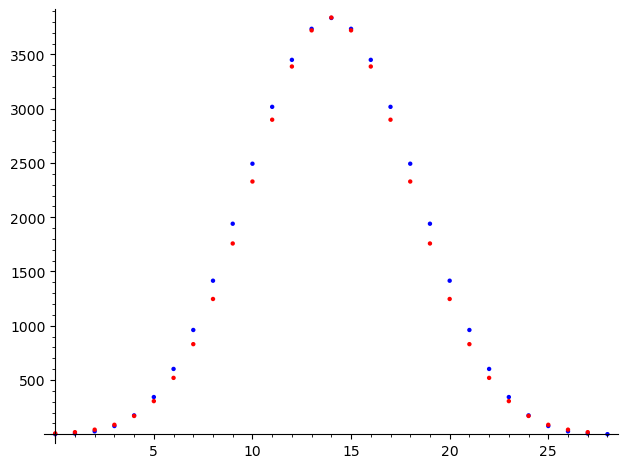

In [6]:
def q4():
    # How many inversions?
    from collections import Counter
    G=SymmetricGroup(8)
    numinvlist = [Permutation(g).number_of_inversions() for g in G]
    co=Counter(numinvlist)
    print(add([co[_] for _ in range(0,12,2)]))

    scale = 38500
    mean = 14
    var = 4
    normal_dist = list(map(lambda x: scale * 1/(var * sqrt(2 * pi)) * exp(-1/2 * ((x - mean)/var)**2), range(0,28)))

    (list_plot(co) + list_plot(normal_dist, rgbcolor='red')).show()

q4()


# Question 5 (todo)

In [50]:
P = polytopes.dodecahedron()
proj = P.projection()
proj.render_solid_3d(opacity=0.3) + proj.render_vertices_3d() + proj.render_wireframe_3d()

Graphics3d Object

In [52]:
P = polytopes.dodecahedron()

reprs = G.conjugacy_classes_representatives()

for repr in reprs:
    print(f"{order(repr)}: {repr}")

print()

1: ()
2: (1,3)(2,4)(5,7)(8,9)(11,12)(13,14)(16,17)(18,19)
3: (20,11,12)(1,7,19)(2,14,17)(3,18,5)(4,16,13)(6,9,8)
2: (10,20)(1,4)(2,3)(5,12)(6,15)(7,11)(8,17)(9,16)(13,14)(18,19)
10: (10,20,5,4,8,15,6,17,1,12)(2,14,9,16,13,3,18,11,7,19)
5: (10,20,5,19,11)(1,18,2,8,16)(3,12,7,4,14)(6,17,13,9,15)
6: (10,1,13,15,4,19)(20,3,18,6,2,14)(5,11,12,17,9,8)(7,16)
5: (10,1,11,12,3)(20,17,19,18,16)(2,15,4,9,8)(5,13,14,7,6)
10: (10,2,6,11,7,15,3,20,9,16)(1,5,13,14,12,4,17,19,18,8)
2: (10,15)(20,6)(1,4)(2,3)(5,17)(7,16)(8,12)(9,11)(13,19)(14,18)



I can't find a way to plot the indices of the vertices so interpreting these is a bit difficult. An isometric projection would also be useful, but again, I can't find an option for that.

All elements not of order 2 are rotations, reflections can only be order 2.

The order 10 rotations are rotations by the smallest amount. One view which seems like it would have 10 fold symmetry if rotating through the viewing axis is the following

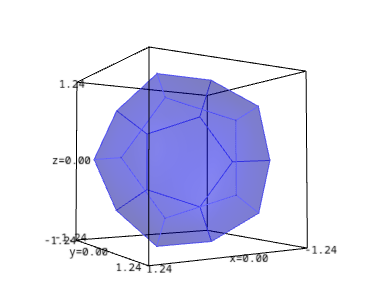

The following view looks like it would produce 3 fold symmetry, and therefore correspond to the order 3 element is

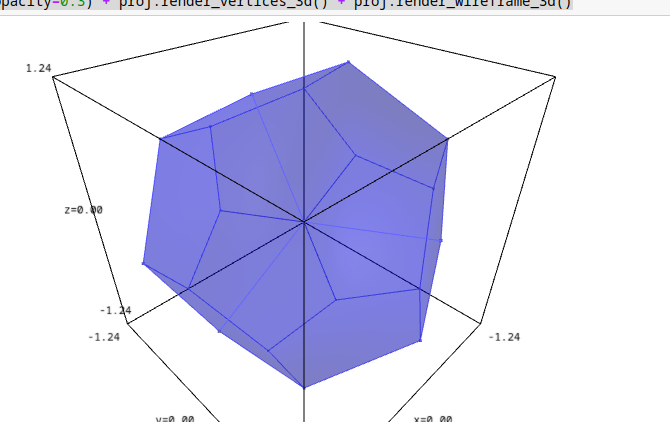

In [57]:

for repr in reprs:
    print(f"{order(repr)}: {repr}")
    # If this is a rotation which has enve order, it might result in a larger
    # rotation around the same axis. See if we can compute that 
    compound = repr
    # -1 because ^order(n-1) is always ()
    for o in range(1, order(repr)-1):
        compound = compound * repr

        if compound in reprs:
            matched.append(compound)

            print(f"    ^{o} produces {compound}")

1: ()
2: (1,3)(2,4)(5,7)(8,9)(11,12)(13,14)(16,17)(18,19)
3: (20,11,12)(1,7,19)(2,14,17)(3,18,5)(4,16,13)(6,9,8)
2: (10,20)(1,4)(2,3)(5,12)(6,15)(7,11)(8,17)(9,16)(13,14)(18,19)
10: (10,20,5,4,8,15,6,17,1,12)(2,14,9,16,13,3,18,11,7,19)
    ^4 produces (10,15)(20,6)(1,4)(2,3)(5,17)(7,16)(8,12)(9,11)(13,19)(14,18)
5: (10,20,5,19,11)(1,18,2,8,16)(3,12,7,4,14)(6,17,13,9,15)
6: (10,1,13,15,4,19)(20,3,18,6,2,14)(5,11,12,17,9,8)(7,16)
    ^2 produces (10,15)(20,6)(1,4)(2,3)(5,17)(7,16)(8,12)(9,11)(13,19)(14,18)
5: (10,1,11,12,3)(20,17,19,18,16)(2,15,4,9,8)(5,13,14,7,6)
10: (10,2,6,11,7,15,3,20,9,16)(1,5,13,14,12,4,17,19,18,8)
    ^4 produces (10,15)(20,6)(1,4)(2,3)(5,17)(7,16)(8,12)(9,11)(13,19)(14,18)
2: (10,15)(20,6)(1,4)(2,3)(5,17)(7,16)(8,12)(9,11)(13,19)(14,18)


The code above also attempts to compute which repeated application of other elements give give other elements. The order(n)-1 elements are the unity elements and not super interesting

The only one that is a compound of other symmetries is `2: (10,15)(20,6)(1,4)(2,3)(5,17)(7,16)(8,12)(9,11)(13,19)(14,18)`

From this My guess is that the other two order two elements are reflections.

For the others, I have no idea what transformations they produce. Lots of 5 way symmetries is expected given that this is a structure composed of 5 gons. 6 is less expected.


# Question 10 and 11

In [8]:
## Utility functions
import math
import sympy
from sage.all import *
from IPython.display import display
import itertools

def multiply_congruence_classes(n: int, class1: int, class2: int):
    for i in range(0, 10):
        for j in range(0, 10):
            print((class1 * i * class2 * j) % n)


def check_lin_diph_sol(a: int, b: int, particular: (int, int), homogenous: (int, int)):
    (xp, yp) = particular
    (xh, yh) = homogenous

    for k in range(-10, 10):
        print(a*(xp + xh*k) + b*(yp + yh*k))


def weird_fun(m: int, n: int, dir: bool, stop_m1=False) -> int:
    print((m, n))
    f = weird_fun

    step_x = lambda: f(m-1, n, dir) + 2*(m-1 + n)
    step_y = lambda: f(m, n-1, dir) + 2*(m + ((n-1) - 1))
    def result():
        if (m,n) == (1, 1):
            return 2
        if m == 1:
            return step_y()
        elif n == 1:
            return step_x()
        elif dir:
            return step_y()
        else:
            return step_x()
    r = result();
    return r

def partial_closed_form(m, n):
    return 2 * ((m-1)*m/2 + n*m - n)

def y_closed(n):
    return n*n - n + 2


def closed_form(m, n):
    # return n**2 - n + 2 + 2*((m-1)*m/2 + n*m - n)
    # return n**2 - n + 2 + m**2 -m + 2*n*m - 2*n
    return n**2 - 3*n + m**2 - m + 2*n*m + 2


In [10]:
def build_matrix(a, b):
    return sympy.Matrix([[1, a, -a, b], [0, 1, 0, b], [0, 0, 1, b], [0, 0, 0, 1]])

def q11_multiply_matrices():
    a1, b1, a2, b2 = sympy.symbols("a_1 b_1, a_2, b_2")
    m1 = build_matrix(a1, b1)
    m2 = build_matrix(a2, b2)
    return m1*m2

q11_multiply_matrices()

Matrix([
[1, a_1 + a_2, -a_1 - a_2, b_1 + b_2],
[0,         1,          0, b_1 + b_2],
[0,         0,          1, b_1 + b_2],
[0,         0,          0,         1]])

In [11]:
##

def q11_inverse():
    a, b = sympy.symbols("a b")
    m1 = build_matrix(a, b)
    return m1.inv()

q11_inverse()

Matrix([
[1, -a, a, -b],
[0,  1, 0, -b],
[0,  0, 1, -b],
[0,  0, 0,  1]])

# Question 10


In [12]:
## Q10a
##
(a,b,c,d) = sympy.symbols("a b c d")
m1 = sympy.Matrix([[0, 1], [1, 0]])
m2 = sympy.Matrix([[1, 0], [0, 1]])

display(m1*m1)

v = sympy.Matrix([[a, b], [c, d]])

print("g*m1:")
display(v*m1)
print("m1*g:")
display(m1*v)
print("Checking identity")
assert(v*m2 == v)
assert(m2*v == v)



Matrix([
[1, 0],
[0, 1]])

g*m1:


Matrix([
[b, a],
[d, c]])

m1*g:


Matrix([
[c, d],
[a, b]])

Checking identity


In [13]:

def set_eq(s1, s2):
    if len(s1) != len(s2):
        return False
    for e1 in s1:
        if e1 not in s2:
            return False
    for e2 in s2:
        if e2 not in s1:
            return False
    return True

# Checks if the set `s` is closed under the binary operation `operation`
# by computing the product of all pairs of elements and ensuring that
# the result is the same as the original set
def ensure_is_closed(s, operation):
    unique_products = []
    for (l, r) in list(itertools.product(s, s)):
        lr = operation(l, r)
        rl = operation(r, l)
        if lr not in unique_products:
            unique_products.append(lr)
        if rl not in unique_products:
            unique_products.append(rl)

    if not set_eq(s, unique_products):
        display("s:")
        for e in s:
            display(e)
        display("products:")
        for e in unique_products:
            display(e)
        assert False

# Ensures that all inverses of elements in `s` are in the set `s`
def ensure_closed_inverses(s, inv_op):
    for e in s:
        if inv_op(e) not in s:
            display("Inv not in s", e)
            assert False

# If `sub` is not a normal group in `big`, return a witness of this fact, i.e. a
# case where an element from sub multiplied by an element in big from the left is not 
# the same as from the right
def non_normal_witness(sub, big, operation):
    for b in big:
        for s in sub:
            l = operation(s, b)
            r = operation(b, s)
            if l != r:
                return [l, r]
    return None


In [14]:
#q10b
##

print("b)")
# New group containing m0, m2 and now some mirroring matrices
original_mats = [
    m1,
    m2,
]
new_mats = [
    sympy.Matrix([[-1, 0], [0, -1]]),
    sympy.Matrix([[0, -1], [-1, 0]])
]

mats = original_mats + new_mats

ensure_is_closed(mats, lambda l, r: l*r)
ensure_closed_inverses(mats, lambda m: m.inv())

if witness := non_normal_witness(original_mats, new_mats, lambda l, r: l*r):
    display("Not normal with witness: ")
    display(witness[0], witness[1])

print("All tests passed! Normal :)")


b)
All tests passed! Normal :)


In [15]:
# Q10c

def q10c():
    h1 = [
        sympy.Matrix([[1, 0], [0, 1]]),
        sympy.Matrix([[0, 1], [1, 0]])
    ]

    h2 = [
        sympy.Matrix([[1, 0], [0, 1]]),
        sympy.Matrix([[-1, 0], [0, -1]])
    ]
    g = [
        sympy.Matrix([[1, 0], [0, 1]]),
        sympy.Matrix([[0, 1], [1, 0]]),
        sympy.Matrix([[0, -1], [-1, 0]]),
        sympy.Matrix([[-1, 0], [0, -1]])
    ]
    op = lambda l, r: l*r
    inv = lambda m: m.inv()

    ensure_is_closed(h1, op)
    ensure_is_closed(h2, op)
    ensure_is_closed(g, op)
    ensure_closed_inverses(h1, inv)
    ensure_closed_inverses(h2, inv)
    ensure_closed_inverses(g, inv)

    assert non_normal_witness(h1, g, op) is None
    assert non_normal_witness(h2, g, op) is None

q10c()
